In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from dowhy import CausalModel
from IPython.display import Image, display

In [2]:
data = pd.read_csv('../data/data_outlier.csv')
data

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
394,555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
395,558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
396,560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [3]:
data = data.drop('Unnamed: 0',axis = 1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
394,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
395,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
396,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [4]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [5]:
# Assigning numerical values and storing in another column
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
394,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
395,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
396,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,398.0,0.246231,0.431357,0.000000,0.000000,0.000000,0.000000,1.000000
radius_mean,398.0,13.376209,2.484104,6.981000,11.710000,12.995000,14.640000,20.590000
texture_mean,398.0,18.505879,3.911148,9.710000,15.702500,18.175000,20.755000,29.810000
perimeter_mean,398.0,86.403266,16.841597,43.790000,75.065000,84.065000,94.730000,137.800000
area_mean,398.0,570.547990,222.883241,143.500000,420.350000,518.300000,664.200000,1320.000000
smoothness_mean,398.0,0.093271,0.012066,0.062510,0.084520,0.092385,0.101750,0.125700
compactness_mean,398.0,0.086260,0.034979,0.019380,0.059592,0.079455,0.108975,0.202200
concavity_mean,398.0,0.060442,0.049068,0.000000,0.025627,0.045580,0.083573,0.254500
concave points_mean,398.0,0.035902,0.025625,0.000000,0.018640,0.028295,0.049478,0.125900
symmetry_mean,398.0,0.173639,0.020819,0.116700,0.159000,0.172250,0.188500,0.245900


In [8]:
data['compactness_mean'].max()


In [9]:
data['compactness_mean'].min()

In [10]:
#rename column concave points_mean
data = data.rename(columns = {'concave points_mean': 'concave_points_mean'}, inplace = False)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
394,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
395,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
396,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [ ]:
df['High_compactness'] = df['compactness_mean'].apply(lambda x: True if x > 0.079455 else False)

In [14]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,High_compactness
0,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,True
1,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,True
2,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,False
3,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,True
4,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,False
394,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,False
395,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,True
396,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321,True


In [28]:
training= data[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave_points_mean','symmetry_mean','High_compactness','diagnosis']].copy()

In [29]:
#Creating the 
causal_graph = """
digraph {
radius_mean;
High_compactness;
diagnosis;
perimeter_mean;
area_mean;
symmetry_mean;
concave_points_mean;
U[label="Unobserved Confounders"];
radius_mean -> area_mean; symmetry_mean -> perimeter_mean;perimeter_mean -> High_compactness
concave_points_mean -> symmetry_mean ;symmetry_mean->radius_mean;
U->concave_points_mean;U->High_compactness;U->diagnosis;
area_mean->diagnosis; High_compactness -> diagnosis;
}
"""

In [30]:
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='High_compactness',
        outcome='diagnosis')


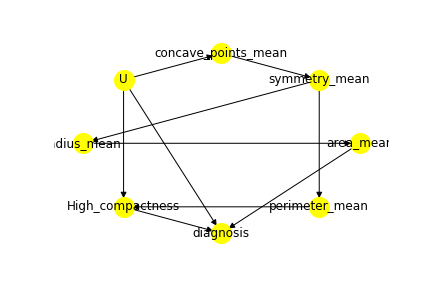

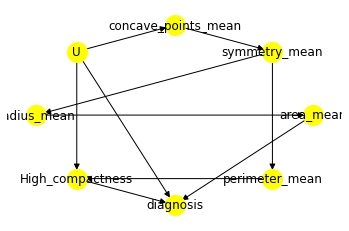

In [31]:
model.view_model()
display(Image(filename="causal_model.png"))

In [32]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(diagnosis|radius_mean,concave_points_mean,area
d[High_compactness]                                                           

                                    
_mean,perimeter_mean,symmetry_mean))
                                    
Estimand assumption 1, Unconfoundedness: If U→{High_compactness} and U→diagnosis then P(diagnosis|High_compactness,radius_mean,concave_points_mean,area_mean,perimeter_mean,symmetry_mean,U) = P(diagnosis|High_compactness,radius_mean,concave_points_mean,area_mean,perimeter_mean,symmetry_mean)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable fou

In [33]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(diagnosis|radius_mean,concave_points_mean,area
d[High_compactness]                                                           

                                    
_mean,perimeter_mean,symmetry_mean))
                                    
Estimand assumption 1, Unconfoundedness: If U→{High_compactness} and U→diagnosis then P(diagnosis|High_compactness,radius_mean,concave_points_mean,area_mean,perimeter_mean,symmetry_mean,U) = P(diagnosis|High_compactness,radius_mean,concave_points_mean,area_mean,perimeter_mean,symmetry_mean)

## Realized estimand
b: diagnosis~High_compactness+radius_mean+concave_points_mean+area_mean+perimeter_mean+symmetry_mean
Target units: ate

## Estimate
Mean value: 0.1867805580226426



C:\Users\Jakinda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
refutel = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a Random Common Cause
Estimated effect:0.1867805580226426
New effect:0.18023275852252302



C:\Users\Jakinda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
refutel = model.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.1867805580226426
New effect:0.18386150647404093
p value:0.43000000000000005



In [38]:
refutel = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:0.1867805580226426
New effect:0.00034830712251703364
p value:0.47

